In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
# Read One Hot Encoded dataset in to DataFrame

df = pd.read_csv("Resources/adult_OHE.csv")
df.head()

,hypertension,heart_disease,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,govt_worker,never_worked,...,never_smoked,current_smoker,age_40-59,age_60 or Older,age_Under 40,avg_glucose_level_75-140,avg_glucose_level_Over 140,avg_glucose_level_Under 75,bmi_Not Obese,bmi_Obese
0,0,1,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [3]:
# Get columns

df.columns


Index(['hypertension', 'heart_disease', 'stroke', 'gender_Female',
       'gender_Male', 'gender_Other', 'ever_married_No', 'ever_married_Yes',
       'govt_worker', 'never_worked', 'private_worker', 'self_employed',
       'minor_unemployed', 'rural_residence', 'urban_residence',
       'smoking_unknown', 'former_smoker', 'never_smoked', 'current_smoker',
       'age_40-59', 'age_60 or Older', 'age_Under 40',
       'avg_glucose_level_75-140', 'avg_glucose_level_Over 140',
       'avg_glucose_level_Under 75', 'bmi_Not Obese', 'bmi_Obese'],
      dtype='object')

In [5]:
df.head()

,hypertension,heart_disease,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,govt_worker,never_worked,...,never_smoked,current_smoker,age_40-59,age_60 or Older,age_Under 40,avg_glucose_level_75-140,avg_glucose_level_Over 140,avg_glucose_level_Under 75,bmi_Not Obese,bmi_Obese
0,0,1,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [6]:
#Create our features

X = df.drop(columns=["stroke"])
y = df["stroke"]

In [7]:
#Create training / testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# BalancedRandomForestClassifier

In [8]:
# Resample the training data with the BalancedRandomForestClassifier

from imblearn.ensemble import BalancedRandomForestClassifier

brf = BalancedRandomForestClassifier(n_estimators=100, random_state=1)
brf_model = brf.fit(X_train, y_train)

In [9]:
# Calculated the balanced accuracy score

y_pred = brf_model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)


0.6943663386222132

In [10]:
#Display confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[252 131]
 [ 14  38]]


In [11]:
# Print the imbalanced classification report

print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.66      0.73      0.78      0.69      0.48       383
          1       0.22      0.73      0.66      0.34      0.69      0.48        52

avg / total       0.86      0.67      0.72      0.72      0.69      0.48       435



In [12]:
# Display sorted feature importances

sorted(zip(brf_model.feature_importances_, X.columns), reverse=True)

[(0.07745192153833606, 'age_60 or Older'),
 (0.0660739827617547, 'age_Under 40'),
 (0.055792448726280836, 'heart_disease'),
 (0.04960615139485656, 'hypertension'),
 (0.047852543649159, 'never_smoked'),
 (0.04262698382136487, 'avg_glucose_level_Over 140'),
 (0.042360210208589176, 'private_worker'),
 (0.04033706898208028, 'age_40-59'),
 (0.04017806749094803, 'rural_residence'),
 (0.039719477566008805, 'current_smoker'),
 (0.03945227056895772, 'avg_glucose_level_75-140'),
 (0.039393326535495966, 'bmi_Obese'),
 (0.039386283246138326, 'urban_residence'),
 (0.03862566406803808, 'former_smoker'),
 (0.0377617967323601, 'bmi_Not Obese'),
 (0.03756090433633136, 'gender_Male'),
 (0.03718638541750329, 'ever_married_Yes'),
 (0.036449743613939815, 'gender_Female'),
 (0.03591337130621323, 'smoking_unknown'),
 (0.03390179252141291, 'ever_married_No'),
 (0.03276706949802879, 'govt_worker'),
 (0.03155629298818139, 'avg_glucose_level_Under 75'),
 (0.02971508368315688, 'self_employed'),
 (0.02325355193111

# RandomForestClassifier

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
# Initialize scaler and scale data

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Fit a Random Forests classifier to the data

clf = RandomForestClassifier(random_state=1).fit(X_train_scaled,y_train)
print(f"Training Score: {clf.score(X_train_scaled, y_train)}")
print(f"Testing Score: {clf.score(X_test_scaled, y_test)}")

Training Score: 0.9501533742331288
Testing Score: 0.8758620689655172


In [16]:
# Save the feature importances from the Random Forests classifier model to a variable named feature_importances

feature_importances = clf.feature_importances_

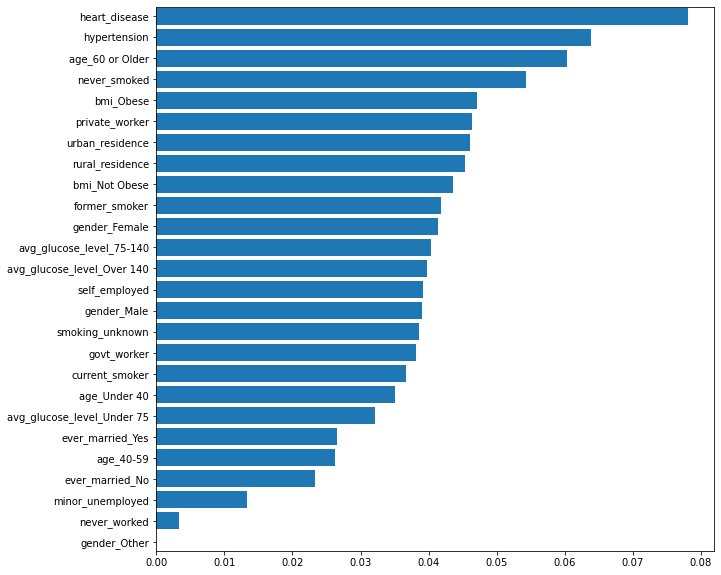

In [17]:
# Use the following code to plot the most important features
features = sorted(zip(X.columns, feature_importances), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,10)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

# Logistic Regression

In [18]:
# Re-initialize variables

X = df.drop(columns=["stroke"])
y = df["stroke"]

In [19]:
# Re-split data in to training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X,
   y, random_state=1, stratify=y)

In [20]:
# Create LR classifier

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(solver='lbfgs',max_iter=200,random_state=1)

In [21]:
# Fit the classifier object to the training data

classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [22]:
# Predict test values and store in variable

y_pred = classifier.predict(X_test)

In [23]:
# Display accuracy score

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.8827586206896552


In [24]:
# Create DataFrame to compare known test values to predicted values

df_lr = pd.DataFrame()
df_lr["Actual"] = y_test
df_lr["pred"] = y_pred

In [25]:
# Locate rows where model corrected predicted stroke cases

df_lr.loc[(df_lr["pred"]==1) & (df_lr["Actual"]==1)]

,Actual,pred
3,1,1
13,1,1
93,1,1
204,1,1
50,1,1
96,1,1
150,1,1


In [26]:
# Examine additional rows for possible stroke cases missed

df_lr.head(50)

,Actual,pred
1463,0,0
1735,0,0
959,0,0
379,0,0
30,1,0
532,0,0
1260,0,0
427,0,0
1514,0,0
732,0,0


# Neural Networks

In [27]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [28]:
# Preprocess numerical data for neural network

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [30]:
# Define the deep learning model 
nn_model = tf.keras.models.Sequential()

# Add hidden layers and output layer
nn_model.add(tf.keras.layers.Dense(units=54, activation="relu", input_dim=26))
nn_model.add(tf.keras.layers.Dense(units=54, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)



Epoch 1/100
41/41 [==============================] - 2s 2ms/step - loss: 0.4276 - accuracy: 0.8627
Epoch 2/100
41/41 [==============================] - 0s 2ms/step - loss: 0.3321 - accuracy: 0.8804
Epoch 3/100
41/41 [==============================] - 0s 1ms/step - loss: 0.3050 - accuracy: 0.8811
Epoch 4/100
41/41 [==============================] - 0s 1ms/step - loss: 0.2917 - accuracy: 0.8827
Epoch 5/100
41/41 [==============================] - 0s 1ms/step - loss: 0.2827 - accuracy: 0.8903
Epoch 6/100
41/41 [==============================] - 0s 1ms/step - loss: 0.2773 - accuracy: 0.8942
Epoch 7/100
41/41 [==============================] - 0s 1ms/step - loss: 0.2714 - accuracy: 0.8965
Epoch 8/100
41/41 [==============================] - 0s 1ms/step - loss: 0.2654 - accuracy: 0.8957
Epoch 9/100
41/41 [==============================] - 0s 2ms/step - loss: 0.2603 - accuracy: 0.8957
Epoch 10/100
41/41 [==============================] - 0s 3ms/step - loss: 0.2556 - accuracy: 0.9026
Epoch 11/

41/41 [==============================] - 0s 4ms/step - loss: 0.1090 - accuracy: 0.9479
Epoch 84/100
41/41 [==============================] - 0s 3ms/step - loss: 0.1129 - accuracy: 0.9463
Epoch 85/100
41/41 [==============================] - 0s 3ms/step - loss: 0.1112 - accuracy: 0.9494
Epoch 86/100
41/41 [==============================] - 0s 2ms/step - loss: 0.1115 - accuracy: 0.9448
Epoch 87/100
41/41 [==============================] - 0s 3ms/step - loss: 0.1122 - accuracy: 0.9448
Epoch 88/100
41/41 [==============================] - 0s 3ms/step - loss: 0.1090 - accuracy: 0.9479
Epoch 89/100
41/41 [==============================] - 0s 2ms/step - loss: 0.1097 - accuracy: 0.9479
Epoch 90/100
41/41 [==============================] - 0s 3ms/step - loss: 0.1121 - accuracy: 0.9440
Epoch 91/100
41/41 [==============================] - 0s 3ms/step - loss: 0.1099 - accuracy: 0.9402
Epoch 92/100
41/41 [==============================] - 0s 2ms/step - loss: 0.1110 - accuracy: 0.9448
Epoch 93/100


In [31]:
# Evaluate the model using the test data

model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

14/14 - 0s - loss: 0.6507 - accuracy: 0.8529 - 201ms/epoch - 14ms/step
Loss: 0.6507410407066345, Accuracy: 0.8528735637664795
